In [8]:
# ebablbe auto-completion
%config Completer.use_jedi = False

In [3]:
import matplotlib.pyplot as plt
import pandas as pd 
import sys 
from scipy.misc import electrocardiogram
from scipy import stats, signal

y_1 = electrocardiogram()[2500:3000]
y_2 = electrocardiogram()[4000:4500]
df = pd.DataFrame(columns=['x', 'y_1', 'y_2'])
df.x = range(len(y_1))
df.y_1 = y_1
df.y_2 = y_2
df

,x,y_1,y_2
0,0,0.390,-0.585
1,1,0.380,-0.565
2,2,0.375,-0.560
3,3,0.365,-0.560
4,4,0.370,-0.555
...,...,...,...
495,495,0.530,-0.860
496,496,0.540,-0.875
497,497,0.545,-0.875
498,498,0.550,-0.870


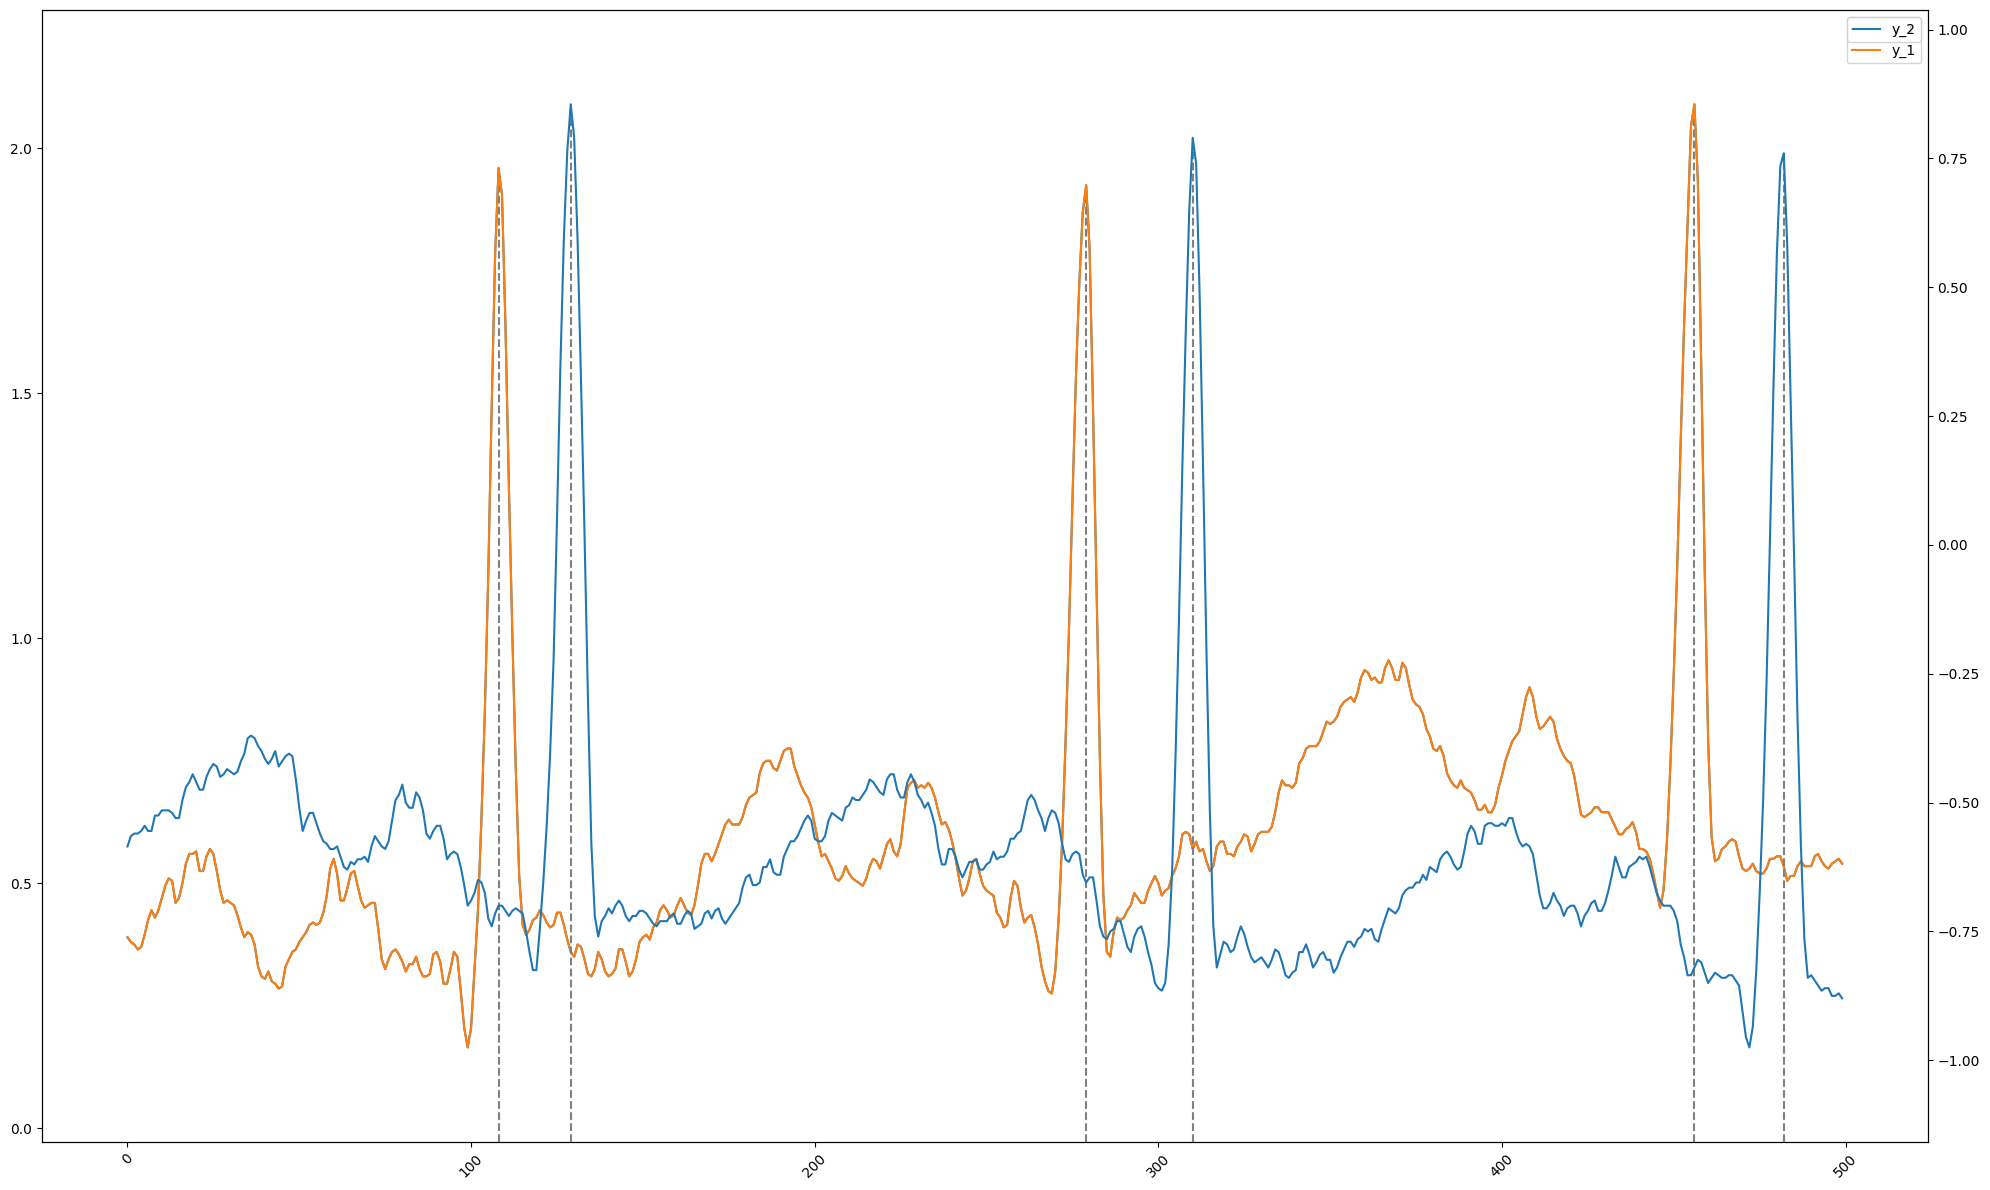

In [10]:
def plot_lines(df, x, y, group_by=None, figsize=(20, 12), show_peaks=True, use_twinx=False, rotation=45):
    def plot_peaks(df1, ax, x, y, min_y):
        peaks, _ = signal.find_peaks(df1[y], height=0, prominence=1)
        df2 = data=df1.iloc[peaks]
#         ax.plot(x, y, "o", data=df2) 
        for i, row in df2.iterrows():
#             print(ax.get_ylim()[0])
            ax.vlines(x=row[x], ymin=min_y, ymax=row[y], colors='grey', linestyles='dashed')  
    
    def get_limits(min_limit, max_limit):
        length = max_limit - min_limit
        min_limit = min_limit - 0.1*length
        max_limit = max_limit + 0.1*length
        return min_limit, max_limit             
        
    fig, ax = plt.subplots(figsize=figsize)
    
    if isinstance(y, list):
        ys = y
    else:
        ys = [y]
        
    if use_twinx and group_by is None and len(ys)==2:
        y = ys[0]
        ax.plot(x, y, label=y, data=df)  
        axs = [ax, ax.twinx()]
        for i, (y, ax_) in enumerate(zip(ys, axs)):
            min_y, max_y = get_limits(df[y].min(), df[y].max())            
            ax_.plot(x, y, label=y, data=df)  
            if show_peaks:
                plot_peaks(df, ax_, x, y, min_y) 
            ax_.set_ylim([min_y, max_y])
            ax_.legend(loc='best')
#             ax_.set_xticklabels(ax_.get_xticks(), rotation = rotation)
            for tick in ax_.get_xticklabels():
                tick.set_rotation(45)      
        fig.tight_layout()
        return

    min_y, max_y = sys.maxsize, -sys.maxsize-1
    for y in ys:
        min_y_, max_y_ = df[y].min(), df[y].max()
        if min_y_<min_y:
            min_y = min_y_
        if max_y < max_y_:
            max_y = max_y_
    min_y, max_y = get_limits(min_y, max_y)

    if group_by is not None:
        for name, df_group in df.groupby(group_by): 
            for y in ys:
                ax.plot(x, y, label=name, data=df_group) 
                if show_peaks:
                    plot_peaks(df_group, ax, x, y, min_y)                                  
    else:    
        for y in ys:
            ax.plot(x, y, label=y, data=df)  
            if show_peaks:
                plot_peaks(df, ax, x, y, min_y)             

    ax.set_ylim([min_y, max_y])
    ax.legend(loc='best')
    fig.tight_layout()
    plt.xticks(rotation=rotation)
    
df_filter = df
ax = plot_lines(df_filter, 'x', ['y_1', 'y_2'], use_twinx=True) 
plt.show()


[  65  251  325  331  336  386  431  464  471  475  481  489  494  496
  500  507  512  520  524  529  535  541  554  560  566  571  578  584
  590  595  608  620  625  631  637  643  651  656  661  668  675  686
  692  703  709  717  722  729  731  733  738  747  758  763  779  788
  793  799  808  811  813  818  825  836  849  856  860  863  867  871
  882  888  895  908  914  927  938  956  967  973  980  987  992  998
 1005 1009 1016 1022 1029 1034 1040 1044 1051 1064 1070 1077 1082 1094
 1099 1105 1111 1125 1136 1144 1147 1154 1161 1167 1171 1179 1186 1188
 1190 1201 1206 1210 1220 1236 1244 1249 1255 1267 1273 1278 1292 1347
 1353 1357 1370 1377 1388 1406 1412 1417 1456 1614 1776 1948]


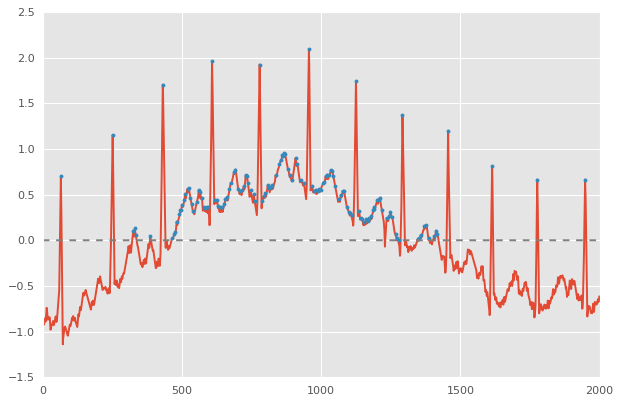

In [24]:
import matplotlib.pyplot as plt
from scipy.misc import electrocardiogram
from scipy.signal import find_peaks

x = electrocardiogram()[2000:4000]

peaks, _ = find_peaks(x, height=0)
print(peaks)
plt.plot(x)
plt.plot(peaks, x[peaks], ".") 
plt.plot(np.zeros_like(x), "--", color="gray")
plt.show()

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_lines(df, x, y, group_by=None, figsize=(20, 10)):
    fig, ax = plt.subplots(figsize=figsize)
        
    if group_by is not None:
        for name, df_group in df.groupby(group_by):
            ax.plot(x, y, label=name, data=df_group)
    else:
        ax.plot(x, y, label=y, data=df)    
    ax.legend(loc='best')
    fig.tight_layout()
    plt.xticks(rotation=45)
    
    
def corrcoef(x, y, shift=0):
    if shift>0:
        x = x[0:-shift]
        y = y[shift:]
    return stats.pearsonr(x, y)[0]


NameError: name 'group_by' is not defined

In [24]:
[item.strip() for item in '  '.split("//") if item.strip()!='']

[]

In [15]:
'  '.split() 

[]

In [14]:
'1 // 2'.split('//')  

['1 ', ' 2']